##CarND Vehicle Detection


Visualize the data set.

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

import glob
import time

import cv2
import numpy as np

import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
from mpl_toolkits.mplot3d import Axes3D

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from scipy.ndimage.measurements import label
import pickle
import glob
from random import shuffle

import os
import time
import math



Total Number of Car Images: 2826
Total Number of Non-Car Images: 8968
Image Size: (64, 64, 3)
Image Type: float32


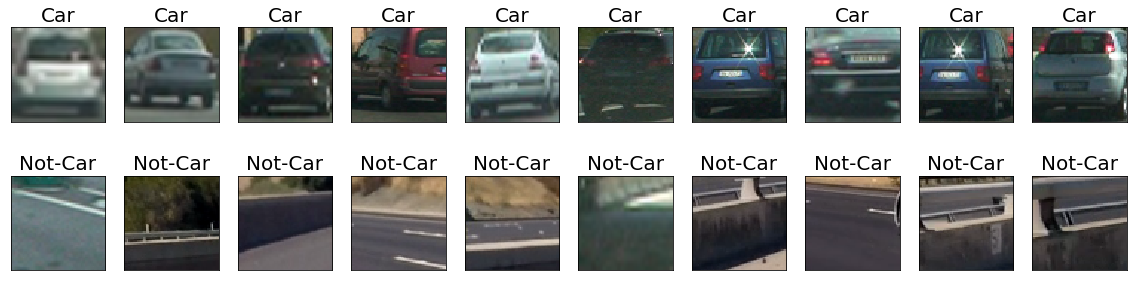

In [2]:
cars_far = glob.glob('datasets/vehicles/GTI_Far/image*.png')
cars_left = glob.glob('datasets/vehicles/GTI_Left/image*.png')
cars_middle = glob.glob('datasets/vehicles/GTI_MiddleClose/image*.png')
cars_right = glob.glob('datasets/vehicles/GTI_Right/image*.png')
cars = cars_far + cars_left + cars_middle + cars_right
shuffle(cars)

not_cars_extras = glob.glob('datasets/non-vehicles/Extras/extra*.png')
not_cars_gti = glob.glob('datasets/non-vehicles/GTI/image*.png')
not_cars = not_cars_extras + not_cars_gti
shuffle(not_cars)

def visualize_data(cars, not_cars):
    data_dict = {}
    data_dict["n_cars"] = len(cars)
    data_dict["n_not_cars"] = len(not_cars)
    img = mpimg.imread(cars[0])
    data_dict["img_shape"] = img.shape
    data_dict["d_type"] = img.dtype
    return data_dict

visual = visualize_data(cars, not_cars)

print('Total Number of Car Images: {0}'.format(visual['n_cars']))
print('Total Number of Non-Car Images: {0}'.format(visual['n_not_cars']))

print('Image Size: {0}\nImage Type: {1}'.format(visual['img_shape'], visual['d_type']))

def random_image(cars, not_cars):
    car_id = np.random.randint(0, len(cars))
    not_car_id = np.random.randint(0, len(not_cars))
    car_image = mpimg.imread(cars[car_id])
    not_car_image = mpimg.imread(not_cars[not_car_id])
    return car_image, not_car_image

n = 0
fig = plt.figure(figsize=(20, 10))
while n < 10:
    car_image, not_car_image = random_image(cars, not_cars)
    fig.add_subplot(1, 10, n+1)
    plt.imshow(not_car_image)
    plt.xticks(()); plt.yticks(());    
    plt.title('Not-Car', fontsize=20)
    fig.add_subplot(2, 10, n+1)
    plt.imshow(car_image)
    plt.xticks(()); plt.yticks(());    
    plt.title('Car', fontsize=20)
    n += 1
plt.savefig('output_images/data_visualization.png', bbox_inches="tight")


In [3]:
#Randomly select an image for visualization.

SyntaxError: invalid syntax (<ipython-input-3-37121db9b7e9>, line 1)

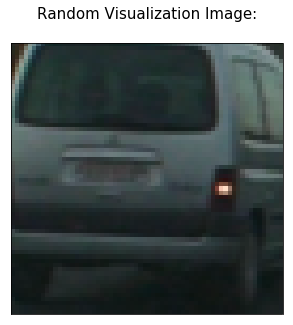

In [4]:
car_id = np.random.randint(0, len(cars))
rand_img = cv2.imread(cars[car_id])
rand_img = cv2.cvtColor(rand_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(rand_img);
plt.title('Random Visualization Image:\n', fontsize=15)
plt.xticks(()); plt.yticks(());
plt.savefig('output_images/random_image_visualization.png', 
            bbox_inches="tight")


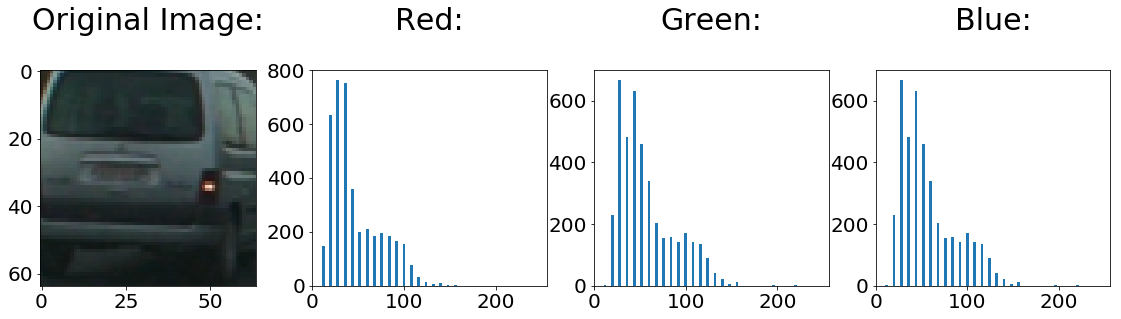

In [11]:
red_hist = np.histogram(rand_img[:,:,0], bins=32, range=(0, 256))
green_hist = np.histogram(rand_img[:,:,1], bins=32, range=(0, 256))
blue_hist = np.histogram(rand_img[:,:,1], bins=32, range=(0, 256))
hist_features = np.concatenate((red_hist[0], green_hist[0], blue_hist[0]))

bin_edges = red_hist[1] #all three bins are the same size
bin_centers = (bin_edges[1:] + bin_edges[00:len(bin_edges) - 1])/2

fig = plt.figure(figsize=(10,3));
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

plt.subplot(1, 4, 1)
plt.imshow(rand_img)
plt.title('Original Image:\n', fontsize=30);

plt.subplot(1, 4, 2)
plt.bar(bin_centers, red_hist[0], width=3)
plt.xlim(0, 256)
plt.title('Red:\n', fontsize=30);

plt.subplot(1, 4, 3)
plt.bar(bin_centers, green_hist[0], width=3)
plt.xlim(0, 256)
plt.title('Green:\n', fontsize=30);

plt.subplot(1, 4, 4)
plt.bar(bin_centers, blue_hist[0], width=3)
plt.xlim(0, 256)
plt.title('Blue:\n', fontsize=30);

plt.subplots_adjust(left=0.5, right=2, top=1, bottom=0.)
plt.savefig('output_images/color_histograms_visualization.png', 
            bbox_inches="tight")

In [ ]:
#plot 3D

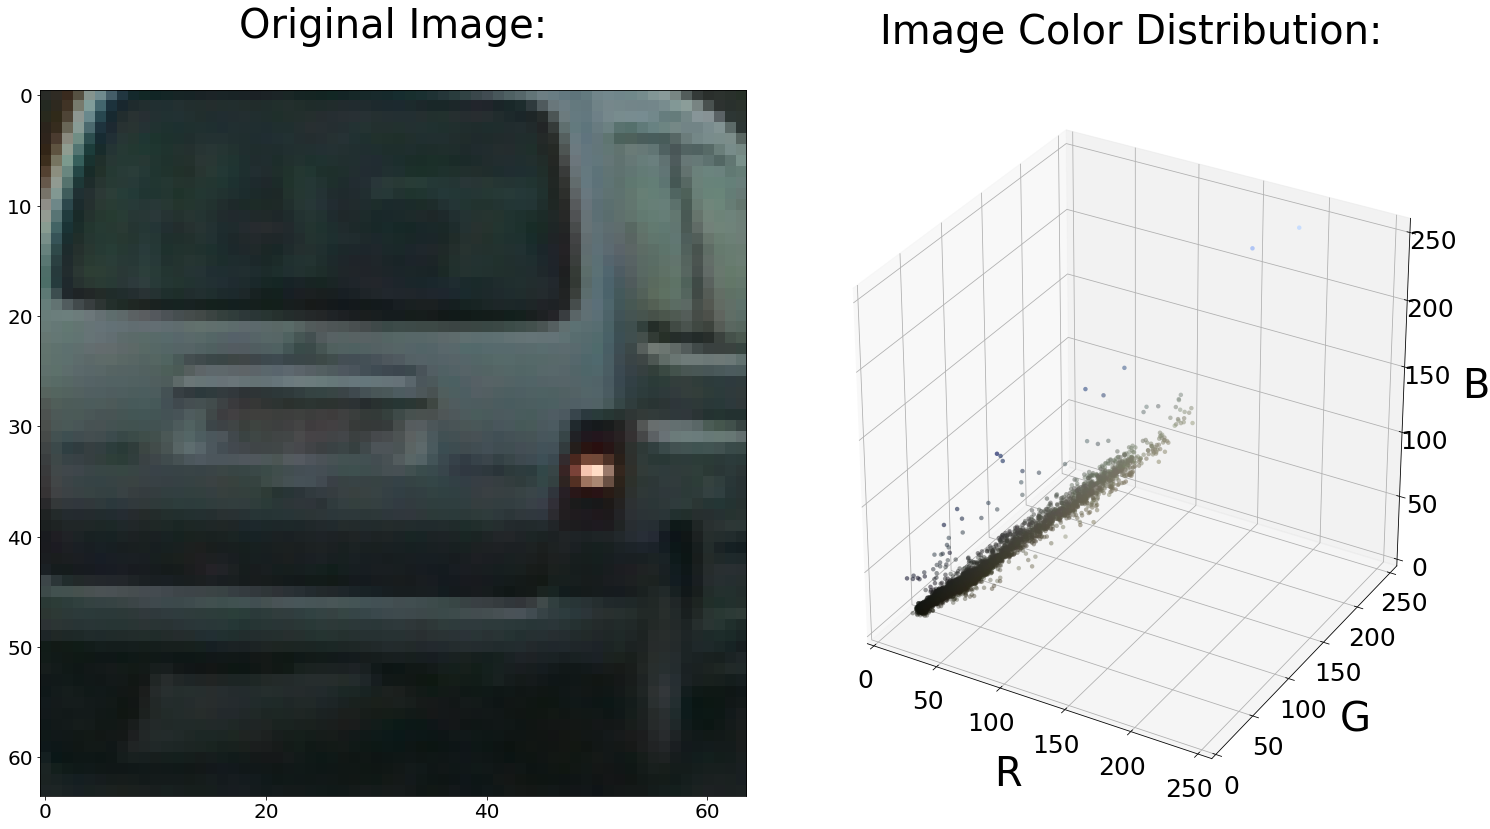

In [12]:
scale = max(rand_img.shape[0], rand_img.shape[1], 64) / 64
img_small = cv2.resize(rand_img, (np.int(rand_img.shape[1] / scale), 
                                  np.int(rand_img.shape[0] / scale)), 
                                  interpolation=cv2.INTER_NEAREST)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.

pixels = img_small_RGB
colors_rgb = img_small_rgb
axis_labels = list('RGB')
axis_limits = [(0,255), (0,255), (0,255)]

f = plt.figure(figsize=(20,10));
ax1 = f.add_subplot(1, 2, 1);
f.tight_layout()
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)
ax1.imshow(rand_img)
ax1.set_title('Original Image:\n', fontsize=40);

ax2 = f.add_subplot(1, 2, 2, projection='3d');
ax2.text2D(0.15, 0.99, "Image Color Distribution:\n", 
           transform=ax2.transAxes, fontsize=40)

ax2.set_xlim(*axis_limits[0])
ax2.set_ylim(*axis_limits[1])
ax2.set_zlim(*axis_limits[2])

ax2.tick_params(axis='both', which='major', labelsize=25, pad=8)
ax2.set_xlabel(axis_labels[0], fontsize=40, labelpad=30)
ax2.set_ylabel(axis_labels[1], fontsize=40, labelpad=30)
ax2.set_zlabel(axis_labels[2], fontsize=40, labelpad=30)

ax2.scatter(pixels[:,:,0].ravel(), pixels[:,:,1].ravel(), 
            pixels[:,:,2].ravel(), c=colors_rgb.reshape((-1, 3)), 
            edgecolors='none');

plt.subplots_adjust(left=0., right=1, top=1, bottom=0.)
plt.savefig('output_images/color_distribution_visualization.png', 
            bbox_inches="tight")

In [ ]:
Spatial bin of an image

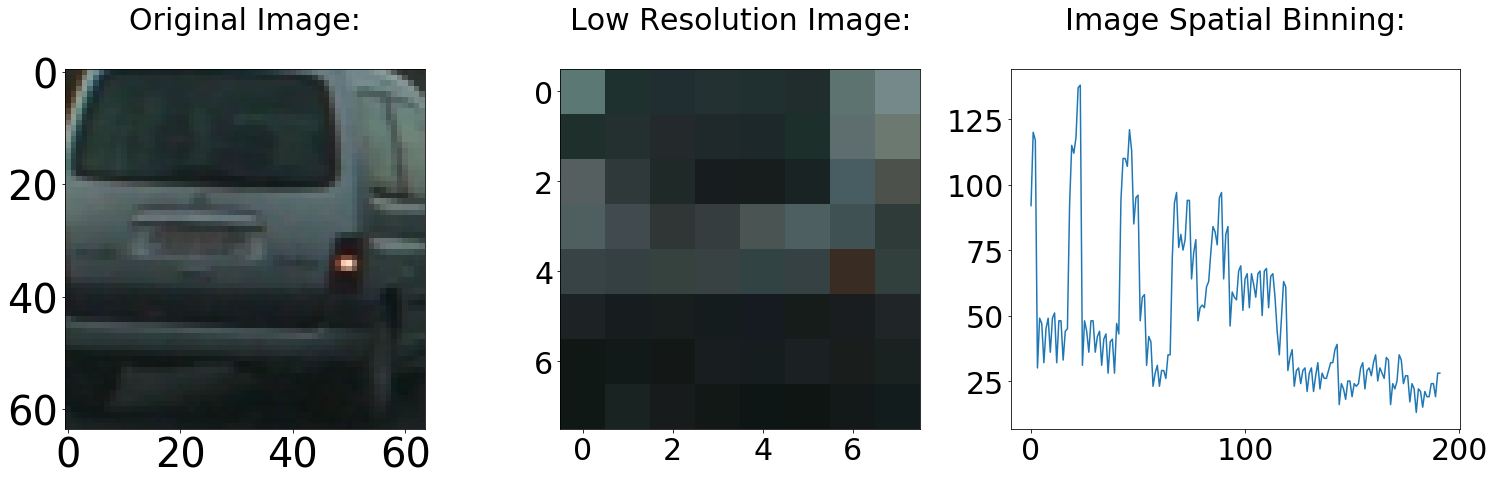

In [13]:
color_space = 'RGB'
size = (8, 8)

small_img = cv2.resize(rand_img, size)

if color_space != 'RGB':
    if color_space == 'HSV':
        feature_img = cv2.cvtColor(rand_img, cv2.COLOR_RGB2HSV)
    elif color_space == 'LUV':
        feature_img = cv2.cvtColor(rand_img, cv2.COLOR_RGB2LUV)
    elif color_space == 'HLS':
        feature_img = cv2.cvtColor(rand_img, cv2.COLOR_RGB2HLS)
    elif color_space == 'YUV':
        feature_img = cv2.cvtColor(rand_img, cv2.COLOR_RGB2YUV)
    elif color_space == 'YCrCb':
        feature_img = cv2.cvtColor(rand_img, cv2.COLOR_RGB2YCrCb)
else: 
    feature_img = np.copy(rand_img)             
features = cv2.resize(feature_img, size).ravel() 

f = plt.figure(figsize=(20, 5));
ax1 = f.add_subplot(1, 3, 1);
f.tight_layout()
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
ax1.imshow(rand_img)
ax1.set_title('Original Image:\n', fontsize=30);

ax2 = f.add_subplot(1, 3, 2);
ax2.imshow(small_img)
ax2.set_title('Low Resolution Image:\n', fontsize=30);

ax3 = f.add_subplot(1, 3, 3);
ax3.plot(features)
ax3.set_title('Image Spatial Binning:\n', fontsize=30);

plt.subplots_adjust(left=0., right=1, top=1, bottom=0.)
plt.savefig('output_images/spatial_binning_visualization.png', 
            bbox_inches="tight")


In [16]:
#Visualize gradient features in an image.

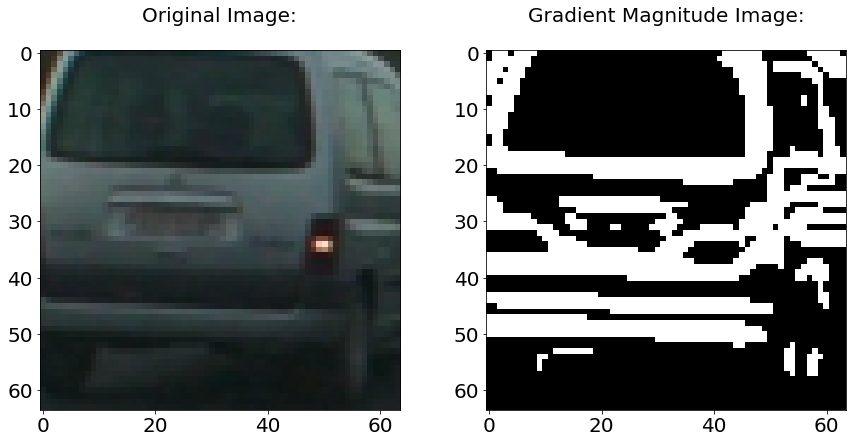

In [18]:
gray = cv2.cvtColor(rand_img, cv2.COLOR_RGB2GRAY)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=9)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=9)
gradmag = np.sqrt(sobel_x**2 + sobel_y**2)
scale_factor = np.max(gradmag)/255 
gradmag = (gradmag/scale_factor).astype(np.uint8) 
binary_output = np.zeros_like(gradmag)
binary_output[(gradmag >= 50) & (gradmag <= 255)] = 1

f = plt.figure(figsize=(12, 5));
ax1 = f.add_subplot(1, 2, 1);
f.tight_layout()
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
ax1.imshow(rand_img)
ax1.set_title('Original Image:\n', fontsize=20);

ax2 = f.add_subplot(1, 2, 2);
ax2.imshow(binary_output, cmap='gray')
ax2.set_title('Gradient Magnitude Image:\n', fontsize=20);

plt.subplots_adjust(left=0., right=1, top=1, bottom=0.)
plt.savefig('output_images/gradient_visualization.png', 
            bbox_inches="tight")

In [ ]:
#Visualize HOG features in an image.

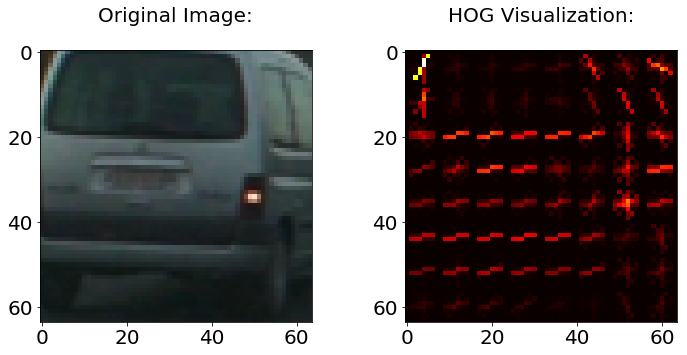

In [20]:
from skimage.feature import hog

hog_img = cv2.cvtColor(rand_img, cv2.COLOR_RGB2GRAY)

features, hog_image = hog(hog_img, 
                          orientations=9, 
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualise=True,
                          feature_vector=False)

fig = plt.figure(figsize=(12, 5));
fig.add_subplot(1, 2, 1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.imshow(rand_img)
plt.title('Original Image:\n', fontsize=20);
fig.add_subplot(1, 2, 2)
plt.imshow(hog_image, cmap='hot')
plt.title('HOG Visualization:\n', fontsize=20);
plt.savefig('output_images/hog_visualization.png', 
            bbox_inches="tight")


In [21]:
import glob

cars = glob.glob('datasets/vehicles/**/*.png', recursive=True)
notcars = glob.glob('datasets/non-vehicles/**/*.png', recursive=True)

    


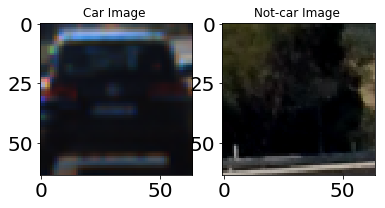

In [22]:
#Two examples 

car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))

# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


plt.subplot(1,2,1)
plt.imshow(car_image)
plt.title('Car Image ')
plt.subplot(1,2,2)
plt.imshow(notcar_image)
plt.title('Not-car Image ')


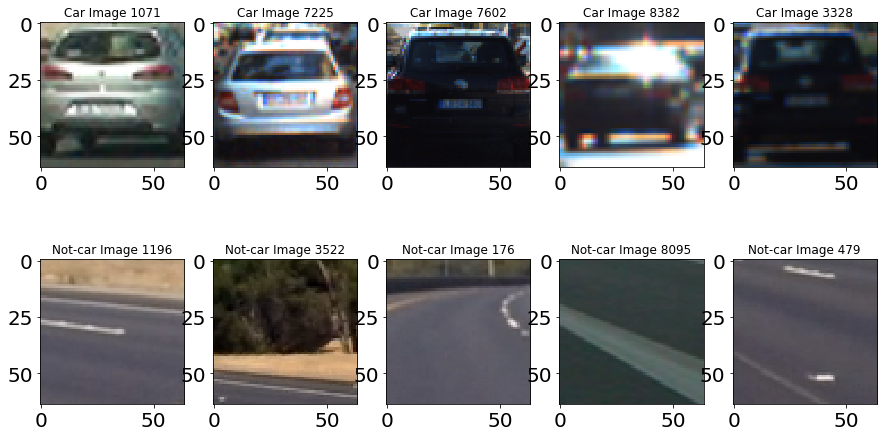

In [23]:
# Plot examples

%matplotlib inline
def plotExamples():
    plt.figure(figsize=(15,8))

    for i in range(5):
        car_ind = np.random.randint(0, len(cars))
        notcar_ind = np.random.randint(0, len(notcars))

        # Read in car / not-car images
        car_image = mpimg.imread(cars[car_ind])
        notcar_image = mpimg.imread(notcars[notcar_ind])


        plt.subplot(2,5,i+1)
        plt.imshow(car_image)
        plt.title('Car Image ' + str(car_ind))
        plt.subplot(2,5,5+i+1)
        plt.imshow(notcar_image)
        plt.title('Not-car Image ' + str(notcar_ind))

interact_manual(plotExamples)

In [24]:
#Data augmentation not need, because seems to already have some, and hog is robust

#Number of samples
n_cars = len(cars)
n_notcars = len(notcars)

print("n_cars: ",n_cars)
print("n_notcars: ",n_notcars)

n_cars:  8792
n_notcars:  8968


In [ ]:
#train classification model 

In [28]:
def get_color_histogram(img, n_bins=32, bins_range=(0, 256)):
    red_hist = np.histogram(img[:,:,0], bins=n_bins, range=bins_range)
    green_hist = np.histogram(img[:,:,1], bins=n_bins, range=bins_range)
    blue_hist = np.histogram(img[:,:,2], bins=n_bins, range=bins_range)
    bin_edges = red_hist[1]
    bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
    hist_features = np.concatenate((red_hist[0], 
                                    green_hist[0], 
                                    blue_hist[0]))
    return red_hist, green_hist, blue_hist, bin_centers, hist_features

def get_3d_color_plot(pixels, colors_rgb,
                      axis_labels=list("RGB"),
                      axis_limits=[(0, 255), (0, 255), (0, 255)]):
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)  
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')
    return ax

def get_bin_spatial(img, color_space='RGB', size=(32, 32)):
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    features = cv2.resize(feature_image, size).ravel() 
    return features

def get_gradient_features(img, sobel_kernel=9, mag_threshold=(60, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    gradmag = np.sqrt(sobel_x**2 + sobel_y**2)
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_threshold[0]) & \
                  (gradmag <= mag_threshold[1])] = 1
    return binary_output

def get_hog_features(img, 
                     orientation=9, 
                     pixels_per_cell=(8,8), 
                     cells_per_block=(2,2), 
                     visualization=False, 
                     feature_vector=True):
    if visualization == True:
        features, hog_image = hog(img, orientations=orientation, 
                                  pixels_per_cell=pixels_per_cell,
                                  cells_per_block=cells_per_block, 
                                  transform_sqrt=False,
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:
        features = hog(img, orientations=orientation, 
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, 
                       transform_sqrt=False,
                       visualise=False, feature_vector=feature_vector) 
        return features
    
def extract_features(images, color_space='RGB', 
                     spatial_size=(32,32), 
                     hist_bins=32, hist_range=(0,256),
                     orientations=9, pixels_per_cell=(8,8),
                     cells_per_block=(2,2), hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    features = []
    for file in tqdm(images):
        file_features = []
        img = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(img)      
        
        if spatial_feat == True:
            spatial_features = get_bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            red_hist, green_hist, blue_hist, bin_centers, hist_features = get_color_histogram(feature_image, n_bins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                                         orientations, pixels_per_cell, 
                                                         cells_per_block, visualization=False,
                                                         feature_vector=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], 
                                                orientations, pixels_per_cell,
                                                cells_per_block, visualization=False,
                                                feature_vector=True)
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))      
    return features


In [ ]:
#classify by color

100%|██████████| 8968/8968 [00:17<00:00, 519.43it/s]


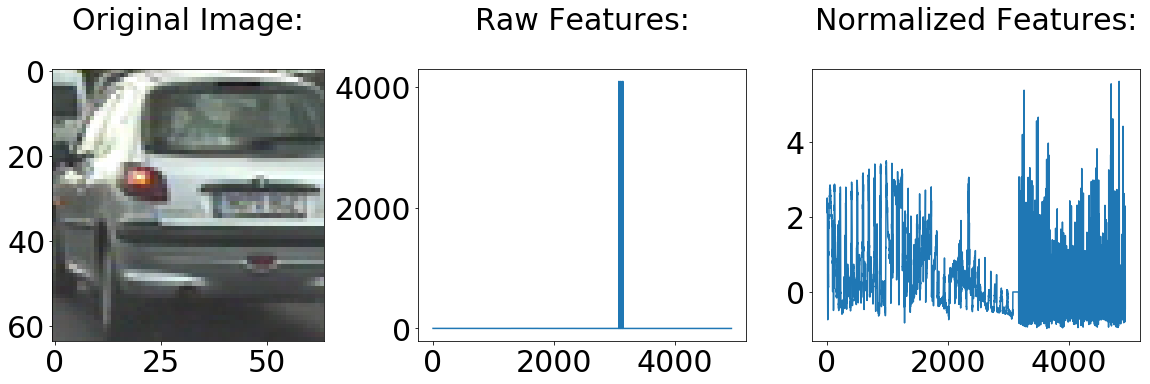

In [30]:
# https://pypi.python.org/pypi/tqdm
from tqdm import tqdm
car_features = extract_features(cars, spatial_feat=True, hist_feat=True)
not_car_features = extract_features(not_cars, spatial_feat=True, hist_feat=True)

if len(car_features) > 0:
    X = np.vstack((car_features, not_car_features)).astype(np.float64)
    X_scaler = StandardScaler().fit(X)
    scaled_X = X_scaler.transform(X)
    
    f = plt.figure(figsize=(20, 5))
    matplotlib.rc('xtick', labelsize=30) 
    matplotlib.rc('ytick', labelsize=30)

    plt.subplot(1, 3, 1)
    plt.imshow(mpimg.imread(cars[car_id]))
    plt.title('Original Image:\n', fontsize=30)
    plt.subplot(1, 3, 2)
    plt.plot(X[car_id])
    plt.title('Raw Features:\n', fontsize=30)
    plt.subplot(1, 3, 3)
    plt.plot(scaled_X[car_id])
    plt.title('Normalized Features:\n', fontsize=30)
    plt.savefig('output_images/color_classification.png')

else:
    print('Returned empty feature vectors.')

In [32]:
#Define a labels vector based on feature lists.

In [33]:
y = np.hstack((np.ones(len(car_features)), np.zeros(len(not_car_features))))

X = np.vstack((car_features, not_car_features)).astype(np.float64)
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)
print('Done.')

Done.


In [34]:
#random shuffle data and split into training, validation, and testing sets.

In [35]:
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,
                                                    test_size=0.2,
                                                    random_state=rand_state)
print('Done.')

Done.


In [36]:
#Train a Linear SVM classifier to classify by color.

In [37]:
svc = LinearSVC()
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'seconds to train SVC.')

15.05 seconds to train SVC.


In [38]:
#Check the accuracy of the color classification.

In [39]:
print('Test Accuracy: {0:0.4f}%'.format(svc.score(X_test, y_test)*100))
print('  Predictions:', svc.predict(X_test[0:10]))
print('       Labels:', y_test[0:10])

Test Accuracy: 96.9032%
  Predictions: [ 1.  1.  1.  0.  1.  0.  0.  1.  1.  0.]
       Labels: [ 1.  1.  1.  0.  1.  0.  0.  1.  1.  0.]


In [40]:
#Classify by HOG

100%|██████████| 8968/8968 [00:15<00:00, 570.16it/s]


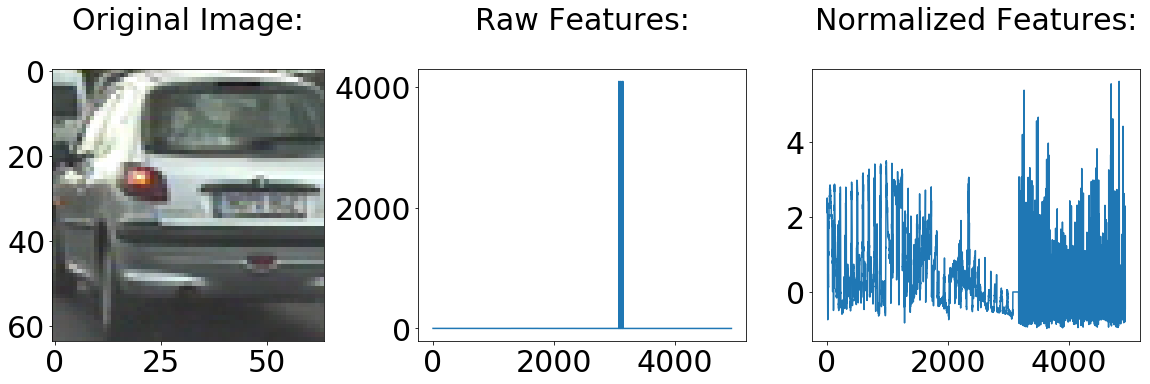

In [42]:
car_features = extract_features(cars, hog_feat=True)
not_car_features = extract_features(not_cars, hog_feat=True)

if len(car_features) > 0:
    X = np.vstack((car_features, not_car_features)).astype(np.float64)
    X_scaler = StandardScaler().fit(X)
    scaled_X = X_scaler.transform(X)
    
    f = plt.figure(figsize=(20, 5))
    matplotlib.rc('xtick', labelsize=30) 
    matplotlib.rc('ytick', labelsize=30)

    plt.subplot(1, 3, 1)
    plt.imshow(mpimg.imread(cars[car_id]))
    plt.title('Original Image:\n', fontsize=30)
    plt.subplot(1, 3, 2)
    plt.plot(X[car_id])
    plt.title('Raw Features:\n', fontsize=30)
    plt.subplot(1, 3, 3)
    plt.plot(scaled_X[car_id])
    plt.title('Normalized Features:\n', fontsize=30)
    plt.savefig('output_images/hog_classification.png')

else:
    print('Returned empty feature vectors.')

In [43]:
#Define a labels vector based on feature lists.
y = np.hstack((np.ones(len(car_features)), np.zeros(len(not_car_features))))

X = np.vstack((car_features, not_car_features)).astype(np.float64)
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)
print('Done.')

Done.


In [44]:
#Train a Linear SVM classifier to classify by HOG.
svc = LinearSVC()
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'seconds to train SVC.')

15.4 seconds to train SVC.


In [45]:
#Check the accuracy of the HOG classification.
print('Test Accuracy: {0:0.4f}%'.format(svc.score(X_test, y_test)*100))
t = time.time()
print('  Predictions:', svc.predict(X_test[0:10]))
print('       Labels:', y_test[0:10])
t2 = time.time()
print(round(t2-t, 5), 'seconds to predict 10 labels with SVC.')

Test Accuracy: 96.8750%
  Predictions: [ 1.  1.  1.  0.  1.  0.  0.  1.  1.  0.]
       Labels: [ 1.  1.  1.  0.  1.  0.  0.  1.  1.  0.]
0.00199 seconds to predict 10 labels with SVC.


In [ ]:
#Section III: Search for Vehicles in Images
#Implement a sliding-window technique to filter the image for possible vehicles.

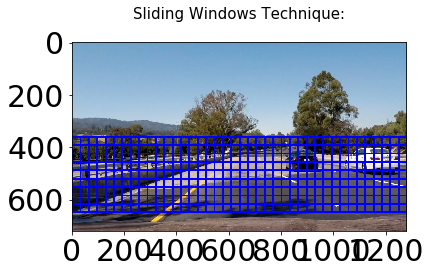

In [47]:
def draw_boxes(img, bboxes, color=(0,0,255), thickness=6):
    img_copy = np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(img_copy, bbox[0], bbox[1], 
                      color, thickness)
    return img_copy

def sliding_windows(img, x_start_stop=[None,None], 
                    y_start_stop=[None,None], xy_window=(64,64),
                    xy_overlap=(0.5,0.5)):
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = int(img.shape[0]*0.5)
    if y_start_stop[1] == None:
        y_start_stop[1] = int(img.shape[0]*0.9)
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    nx_windows = np.int(xspan/nx_pix_per_step) - 1
    ny_windows = np.int(yspan/ny_pix_per_step) - 1
    window_list = []
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            window_list.append(((startx, starty), (endx, endy)))
    return window_list

test_img = mpimg.imread('test_images/test4.jpg')

windows =  sliding_windows(test_img)

window_img = draw_boxes(test_img, windows)
plt.imshow(window_img);
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
plt.title('Sliding Windows Technique:\n', fontsize=15);
plt.savefig('output_images/sliding_windows.png')

100%|██████████| 8968/8968 [00:22<00:00, 403.44it/s]


Using: 9 orientations (16, 16) pixels per cell and (4, 4) cells per block
Feature vector length: 1248
2.59  seconds to train SVC.
Test Accuracy of SVC: 97.4662%


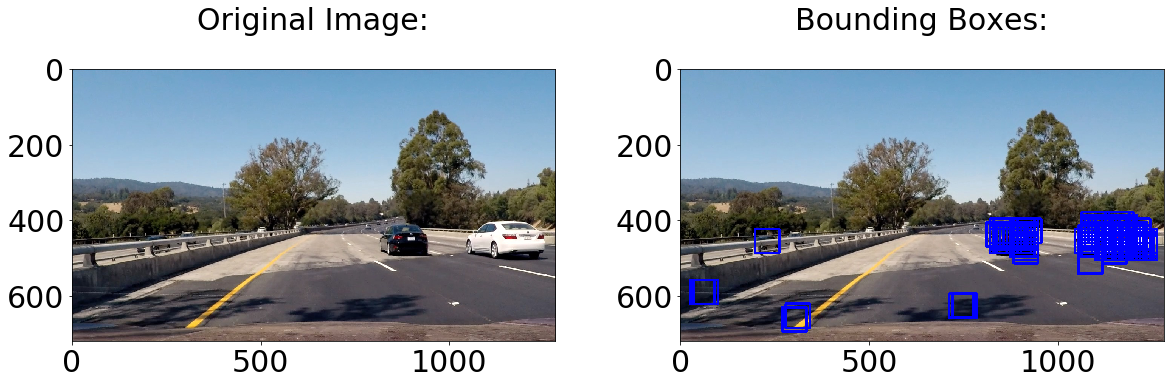

In [50]:
#Apply trained classifier to search for vehicles in sliding-window images.
def single_img_features(img, color_space='RGB', 
                        spatial_size=(64,64), hist_bins=64, 
                        orientations=9, pixels_per_cell=(8,8), 
                        cells_per_block=(2,2), hog_channel=0, 
                        spatial_feat=True, hist_feat=True, 
                        hog_feat=True):
    img_features = []
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)  
    if spatial_feat == True:
        spatial_features = get_bin_spatial(feature_image, size=spatial_size)
        img_features.append(spatial_features)
    if hist_feat == True:
        red_hist, green_hist, blue_hist, bin_centers, hist_features = get_color_histogram(feature_image, n_bins=hist_bins)
        img_features.append(hist_features)
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                                     orientations, pixels_per_cell,
                                                     cells_per_block, 
                                                     visualization=False,
                                                     feature_vector=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], 
                                            orientations, pixels_per_cell,
                                            cells_per_block, visualization=False,
                                            feature_vector=True)
        img_features.append(hog_features)
    return np.concatenate(img_features)

def search_windows(img, windows, svc, scaler, 
                   color_space='RGB', spatial_size=(64,64), 
                   hist_bins=64, hist_range=(0,256), orientations=9,
                   pixels_per_cell=(8,8), cells_per_block=(2,2),
                   hog_channel=0, spatial_feat=True,
                   hist_feat=True, hog_feat=True):
    on_windows = []
    for window in windows:
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orientations=orientations, pixels_per_cell=pixels_per_cell, 
                            cells_per_block=cells_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        prediction = svc.predict(test_features)
        if prediction == 1:
            on_windows.append(window)
    return on_windows

color_space = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orientations = 9  # HOG orientations
pixels_per_cell = (16,16) # HOG pixels per cell
cells_per_block = (4,4) # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16 # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orientations=orientations, pixels_per_cell=pixels_per_cell, 
                        cells_per_block=cells_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
not_car_features = extract_features(not_cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orientations=orientations, pixels_per_cell=pixels_per_cell, 
                        cells_per_block=cells_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, not_car_features)).astype(np.float64)                        
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)

y = np.hstack((np.ones(len(car_features)), np.zeros(len(not_car_features))))

X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2)

print('Using:', orientations, 'orientations', pixels_per_cell,
    'pixels per cell and', cells_per_block, 'cells per block')
print('Feature vector length:', len(X_train[0]))

svc = LinearSVC()
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), ' seconds to train SVC.')
print('Test Accuracy of SVC: {0}%'.format(round(svc.score(X_test, y_test)*100, 4)))
t=time.time()

img = mpimg.imread('test_images/test4.jpg')
draw_img = np.copy(img)

# Training Data extracted from .png images (scaled 0 to 1 by mpimg)
# Search image is a .jpg (scaled 0 to 255)
img = img.astype(np.float32)/255

windows = sliding_windows(img, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(64, 64), xy_overlap=(0.85, 0.85))

hot_windows = search_windows(img, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orientations=orientations, pixels_per_cell=pixels_per_cell, 
                        cells_per_block=cells_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_img, hot_windows)                    

f = plt.figure(figsize=(20, 5))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image:\n', fontsize=30);
plt.subplot(1, 2, 2)
plt.imshow(window_img)
plt.title('Bounding Boxes:\n', fontsize=30);

bbox_pickle = {}
all_bboxes = hot_windows
bbox_pickle["bboxes"] = all_bboxes
pickle.dump('output_images', open("bbox_pickle.p", "wb"));

plt.savefig('output_images/positive_window_detections.png')

In [51]:
#Section IV: Test on a Video Stream
#Create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.

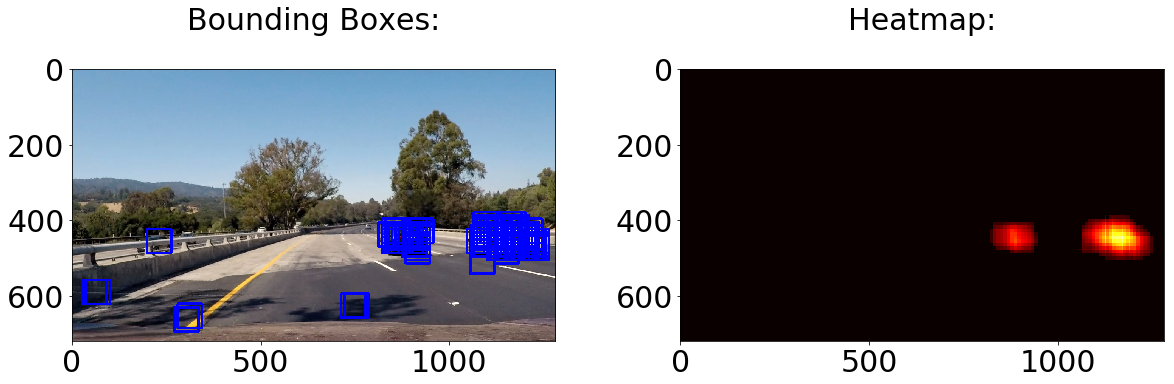

In [53]:
def add_heat(heatmap, bbox_list):
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    return heatmap
 
def apply_heat_threshold(heatmap, threshold=4):
    heatmap[heatmap <= threshold] = 0
    return heatmap

bbdict = pickle.load( open( "bbox_pickle.p", "rb" ))
all_bboxes = bbox_pickle["bboxes"]

img = mpimg.imread('test_images/test4.jpg')
#img = undistort(img)
heatmap = np.zeros_like(img[:,:,0].astype(np.float))

heatmap = add_heat(heatmap, all_bboxes)
heatmap = apply_heat_threshold(heatmap)
heatmap = np.clip(heatmap-2, 0, 255)

labels = label(heatmap)

#print('Cars Found: {0}'.format(labels[1]))

f = plt.figure(figsize=(20, 5))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

plt.subplot(1, 2, 1)
plt.imshow(window_img)
plt.title('Bounding Boxes:\n', fontsize=30);
plt.subplot(1, 2, 2)
plt.imshow(heatmap, cmap='hot')
plt.title('Heatmap:\n', fontsize=30);
plt.savefig('output_images/heatmap.png')

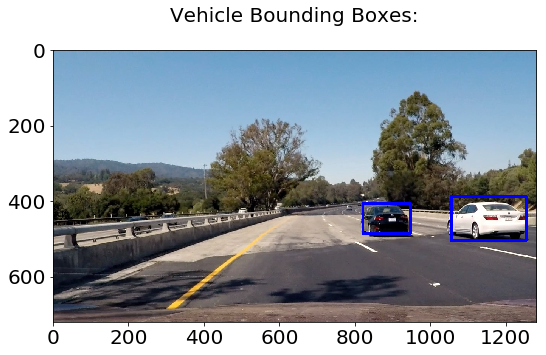

In [54]:
#Estimate a bounding box for vehicles detected.
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

img = mpimg.imread('test_images/test4.jpg')
draw_img = np.copy(img)
draw_img = draw_labeled_bboxes(draw_img, labels)

f = plt.figure(figsize=(20, 5))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.imshow(draw_img)
plt.title('Vehicle Bounding Boxes:\n', fontsize=20);

In [55]:
#Output results as a video
def BGRtoYUV(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

orientations = 8
pixels_per_cell = 8
cells_per_block = 2

def hog_features(channel, visualise=False):
    if visualise == True:
        features, hog_image = hog(channel, orientations=orientations,
                                  pixels_per_cell=(pixels_per_cell, pixels_per_cell),
                                  cells_per_block=(cells_per_block, cells_per_block),
                                  transform_sqrt=False, visualise=True, feature_vector=False)
        return hog_image
    else:      
        features = hog(channel, orientations=orientations,
                       pixels_per_cell=(pixels_per_cell, pixels_per_cell),
                       cells_per_block=(cells_per_block, cells_per_block),
                       transform_sqrt=False, visualise=False, feature_vector=True)
        return features

def derive_features(img):
    img = BGRtoYUV(img)
    features_y = hog_features(img[:,:,0])
    features_u = hog_features(img[:,:,1])
    features_v = hog_features(img[:,:,2])
    return np.concatenate((features_y, features_u, features_v))

def search_windows(img, windows, clf, scaler):
    # Create a list to hold the positive detections.
    on_windows = []
    
    # Iterate over all the windows in the list.
    for window in windows:
        # Extract the window image from the original image.
        window_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
        # Convert to the expected BGR in feature extractor.
        window_img = cv2.cvtColor(window_img, cv2.COLOR_RGB2BGR)
        # Extract features for the resized window image
        features = derive_features(window_img)
        # Normalize the extracted features.
        features = scaler.transform(np.array(features).reshape(1, -1))
        # Save the window if prediction is positive.
        if clf.decision_function(features) > threshold:
            on_windows.append(window)
    
    # Return the windows with positive detections.
    return on_windows

In [57]:
input_images = []
y = []

for filename in tqdm(glob.glob('datasets/vehicles/*/*.png')):
    img = cv2.imread(filename)
    features = derive_features(img)
    input_images.append(features)
    y.append(True)

for filename in tqdm(glob.glob('datasets/non-vehicles/*/*.png')):
    img = cv2.imread(filename)
    features = derive_features(img)
    input_images.append(features)
    y.append(False)

100%|██████████| 8968/8968 [00:27<00:00, 320.93it/s]


In [58]:
X_scaler = StandardScaler().fit(input_images)
input_images = X_scaler.transform(input_images)

X_train, X_test, y_train, y_test = train_test_split(input_images, y, test_size=0.2, stratify=y, random_state=1)

classifier = LinearSVC(random_state=1)
classifier.fit(X_train, y_train)

print('Vehicle classifier trained with test accuracy: %.1f%%' % (100. * classifier.score(X_test, y_test)))

Vehicle classifier trained with test accuracy: 98.5%


In [59]:
WINDOW_SIZES = [(64, 64), (96, 96), (128, 128)]
WINDOW_Y_START_STOP = [(400, 500), (400, 500), (400, 500)]
WINDOW_OVERLAP = (0.8, 0.8)

# img is of RGB type
def slide_window(img):
    window_list = []
    
    for (xy_window, y_start_stop) in zip(WINDOW_SIZES, WINDOW_Y_START_STOP):
        x_start = int(img.shape[1]/2)
        x_stop = img.shape[1]
        y_start = y_start_stop[0]
        y_stop = y_start_stop[1]
    
        # Compute ROI.
        xspan = x_stop - x_start
        yspan = y_stop - y_start
        
        # Compute the step between successive windows.
        nx_pix_per_step = np.int(xy_window[0] * (1. - WINDOW_OVERLAP[0]))
        ny_pix_per_step = np.int(xy_window[1] * (1. - WINDOW_OVERLAP[1]))
        # Compute the number of windows to generate at this size.
        nx_windows = int(xspan/nx_pix_per_step) - 1
        ny_windows = int(yspan/ny_pix_per_step) - 1
        # Loop through the x and y positions to find the window coordinates.
        for ys in range(ny_windows):
            for xs in range(nx_windows):
                startx = xs*nx_pix_per_step + x_start
                endx = startx + xy_window[0]
                starty = ys*nx_pix_per_step + y_start
                endy = starty + xy_window[1]
                window_list.append(((startx, starty), (endx, endy)))
                
    # Return the list of windows.
    return window_list

img = cv2.imread('test_images/test4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
windows = slide_window(img)
img = draw_boxes(img, windows)

In [60]:
threshold = 0.8

def search_windows(img, windows, clf, scaler):
    # Create a list to hold the positive detections.
    on_windows = []
    
    # Iterate over all the windows in the list.
    for window in windows:
        # Extract the window image from the original image.
        window_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
        # Convert to the expected BGR in feature extractor.
        window_img = cv2.cvtColor(window_img, cv2.COLOR_RGB2BGR)
        # Extract features for the resized window image
        features = derive_features(window_img)
        # Normalize the extracted features.
        features = scaler.transform(np.array(features).reshape(1, -1))
        # Save the window if prediction is positive.
        if clf.decision_function(features) > threshold:
            on_windows.append(window)
    
    # Return the windows with positive detections.
    return on_windows

img = cv2.imread('test_images/test4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
windows = slide_window(img)
windows = search_windows(img, windows, classifier, X_scaler)
img = draw_boxes(img, windows)

In [61]:
HEATMAP_THRESHOLD = 4

def add_heat(heatmap, bboxes):
    # Iterate through each bbox.
    for bbox in bboxes:
        # Add +1 for all pixels inside each bbox.
        heatmap[bbox[0][1]:bbox[1][1], bbox[0][0]:bbox[1][0]] += 1
    # Return updated heatmap.
    return heatmap
    
def apply_threshold(heatmap):
    # Zero out pixels below the threshold.
    heatmap[heatmap <= HEATMAP_THRESHOLD] = 0
    # Return thresholded map.
    return heatmap

img = cv2.imread('test_images/test4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
windows = slide_window(img)
windows = search_windows(img, windows, classifier, X_scaler)
heatmap = np.zeros_like(img[:,:,0]).astype(np.float)
heatmap = add_heat(heatmap, windows)
heatmap = apply_threshold(heatmap)

In [62]:
def draw_labeled_bboxes(img, heatmap):
    # Generate the labels from the heat map.
    labels = label(heatmap)
    # Keep a list of bboxes for detected vehicles.
    bboxes = []
    # Iterate through all detected vehicles.
    for vehicle in range(1, labels[1]+1):
        # Find pixels with each vehicle label value.
        nonzero = (labels[0] == vehicle).nonzero()
        # Identify x and y values of those pixels.
        nonzerox = np.array(nonzero[0])
        nonzeroy = np.array(nonzero[1])
        # Define a bounding box based on the min/max x and y.
        bbox = ((np.min(nonzeroy), np.min(nonzerox)), (np.max(nonzeroy), np.max(nonzerox)))
        bboxes.append(bbox)
    # Draw the bounding boxes for the detected vehicles.
    img = draw_boxes(img, bboxes)
    # Return the annotated image.
    return img

img = cv2.imread('test_images/test4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
windows = slide_window(img)
windows = search_windows(img, windows, classifier, X_scaler)
heatmap = np.zeros_like(img[:,:,0]).astype(np.float)
heatmap = add_heat(heatmap, windows)
heatmap = apply_threshold(heatmap)
img = draw_labeled_bboxes(img, heatmap)

In [63]:
frame_count = 5

class VehicleDetector:
    def __init__(self):
        self.bboxes = []
    
    def add_bboxes(self, bboxes):
        self.bboxes.append(bboxes)
        self.bboxes = self.bboxes[-frame_count:]
    
    def heatmap(self):
        heatmap = np.zeros_like(img[:,:,0]).astype(np.float)
        for bboxes in self.bboxes:
            add_heat(heatmap, bboxes)
        heatmap = apply_threshold(heatmap)
        return heatmap

In [64]:
def video_pipeline(img, vehicle_detector=None):
    if vehicle_detector is None:
        vehicle_detector = VehicleDetector()
    windows = slide_window(img)
    windows = search_windows(img, windows, classifier, X_scaler)
    vehicle_detector.add_bboxes(windows)
    heatmap = vehicle_detector.heatmap()
    img = draw_labeled_bboxes(img, heatmap)
    return img

In [67]:
# http://zulko.github.io/moviepy/
from moviepy.editor import VideoFileClip
video_output = 'P5_test_video.mp4'
clip = VideoFileClip('test_video.mp4')

output_clip = clip.fl_image(video_pipeline) #color images only
%time output_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video P5_test_video.mp4
[MoviePy] Writing video P5_test_video.mp4


 97%|█████████▋| 38/39 [00:55<00:01,  1.65s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: P5_test_video.mp4 

CPU times: user 54.8 s, sys: 228 ms, total: 55 s
Wall time: 55.8 s


In [68]:
# http://zulko.github.io/moviepy/
from moviepy.editor import VideoFileClip
video_output = 'P5_project_video_final.mp4'
clip = VideoFileClip('project_video.mp4')

output_clip = clip.fl_image(video_pipeline) #color images only
%time output_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video P5_project_video_final.mp4
[MoviePy] Writing video P5_project_video_final.mp4


100%|█████████▉| 1260/1261 [32:46<00:01,  1.43s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: P5_project_video_final.mp4 

CPU times: user 32min 30s, sys: 10.9 s, total: 32min 41s
Wall time: 32min 47s
